In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv? -O aerofit_treadmill.csv

--2023-11-21 15:01:03--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.224.9.103, 13.224.9.129, 13.224.9.24, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.224.9.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit_treadmill.csv’

aerofit_treadmill.c 100%[===================>]   7.11K  --.-KB/s    in 0s      

2023-11-21 15:01:03 (3.00 GB/s) - ‘aerofit_treadmill.csv’ saved [7279/7279]



In [ ]:
df=pd.read_csv('aerofit_treadmill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


**BASIC OBSERVATION OF DATA**





In [ ]:
df.shape

(180, 9)

In [ ]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

Only 3 columns: Product, Gender & MaritalStatus are in string rest 6 columns in integer

**Outlier detection & Missing Values**

In [ ]:
#Statistical analysis
df1=df.describe()
df1

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**Descriptive Analysis**
-Total count of all columns is 180.

-Age: Mean age of the customer is 28 years, half of the customer's mean age is 26.

-Education: Mean Education is 15 with maximum as 21 and minimum as 12.

-Usage: Mean Usage per week is 3.4, with maximum as 7 and minimum as 2.

-Fitness: Average rating is 3.3 on a scale of 1 to 5.

-Miles: Average number of miles the customer walks is 103 with maximum distance travelled by most people is almost 115 and minimum is 21.

-Income (in $): Most customer earns around 58K annually, with maximum of 104K and minimum almost 30K








In [ ]:
for col in df1.columns:
 print('For',col,'difference in mean and median :',round(abs(df1[col]['mean']-df1[col]['50%']),3))


For Age difference in mean and median : 2.789
For Education difference in mean and median : 0.428
For Usage difference in mean and median : 0.456
For Fitness difference in mean and median : 0.311
For Income difference in mean and median : 3123.078
For Miles difference in mean and median : 9.194


we can clearly see from above Income has the highest difference followed by miles[with a relatively smaller difference] which indicates the presence of outliers.

**Graphical Representation with the help of Boxplot**

<Axes: >

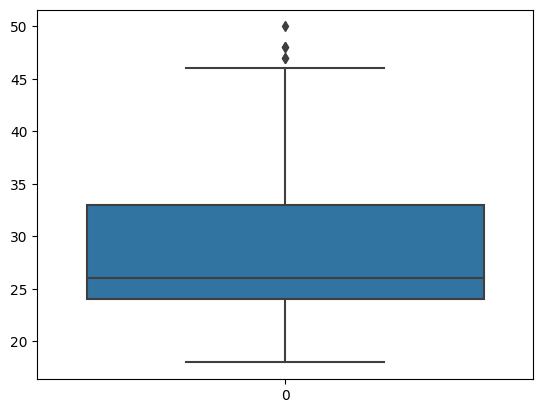

In [ ]:
sns.boxplot(data=df['Age'])

<Axes: >

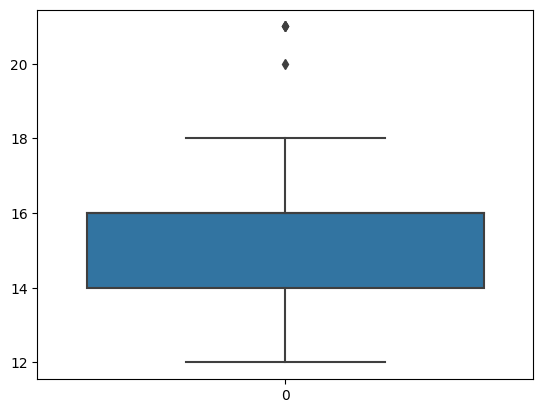

In [ ]:
sns.boxplot(data=df['Education'])

<Axes: >

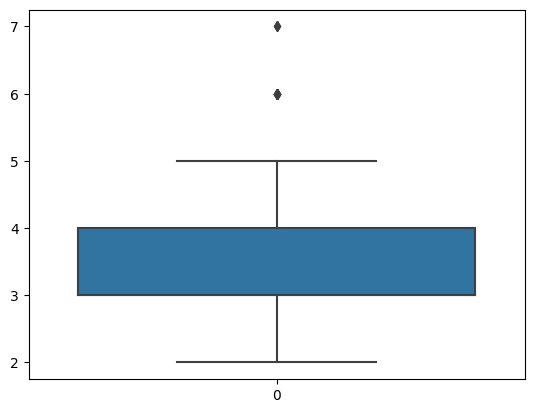

In [ ]:
sns.boxplot(data=df['Usage'])

<Axes: >

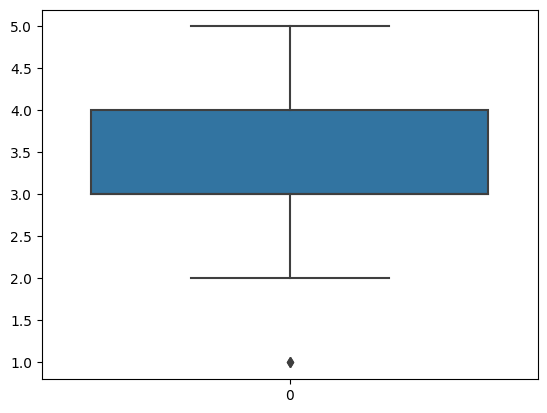

In [ ]:
sns.boxplot(data=df['Fitness'])

<Axes: >

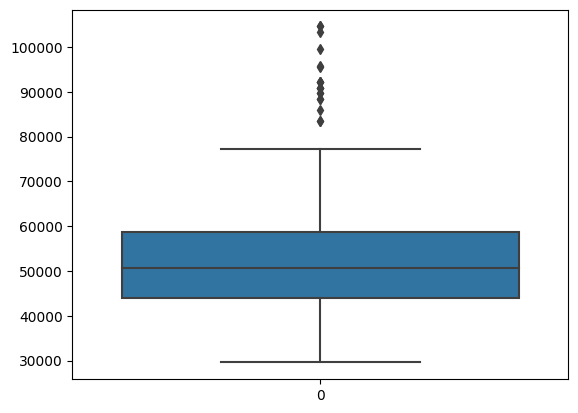

In [ ]:
sns.boxplot(data=df['Income'])

<Axes: >

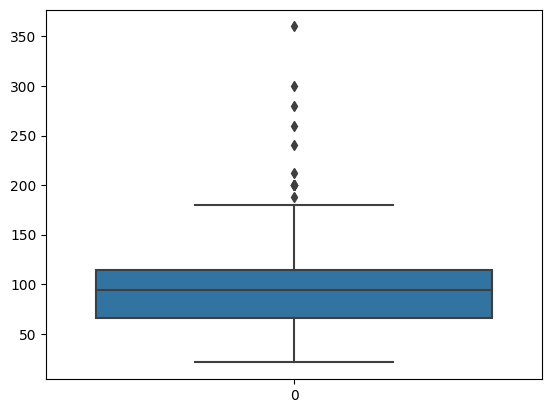

In [ ]:
sns.boxplot(data=df['Miles'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


We don't have any missing values

In [ ]:
#Number_of_unique_values_for_each_column
for col in df.columns:
  print('No. of unique values in',col,':',df[col].nunique())

No. of unique values in Product : 3
No. of unique values in Age : 32
No. of unique values in Gender : 2
No. of unique values in Education : 8
No. of unique values in MaritalStatus : 2
No. of unique values in Usage : 6
No. of unique values in Fitness : 5
No. of unique values in Income : 62
No. of unique values in Miles : 37


In [ ]:
df['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

maximum usage of 7 days only done by 2 people. Minimum usage of 3 days done by majority of the people .Same can be demonstarted with the help of a histogram


<Axes: xlabel='Usage', ylabel='Count'>

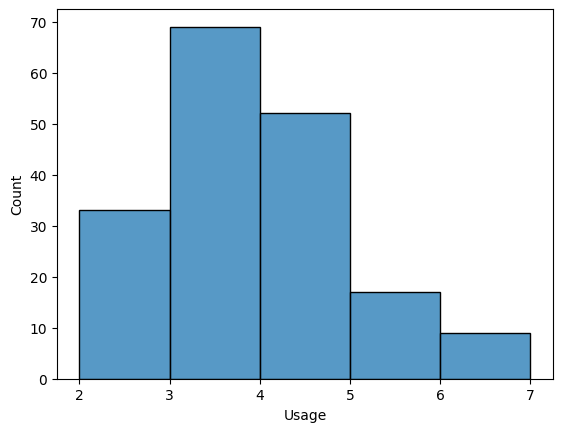

In [ ]:
sns.histplot(data=df,x='Usage',bins=5)

In [ ]:
usage_3_weekly=df[df['Usage']==3]['Gender'].value_counts()
usage_3_weekly

Male      36
Female    33
Name: Gender, dtype: int64

In [ ]:
usage_3_weekly=df[df['Usage']==3]['MaritalStatus'].value_counts()
usage_3_weekly

Partnered    40
Single       29
Name: MaritalStatus, dtype: int64

In [ ]:
usage_3_weekly=df[df['Usage']==3]['Income'].mean()
usage_3_weekly

47921.75362318841

In [ ]:
usage_3_weekly=df[df['Usage']==3]['Age'].mean()
usage_3_weekly

28.985507246376812

In [ ]:
usage_3_weekly=df[df['Usage']==3]['Education'].mean()
usage_3_weekly

15.115942028985508

In [ ]:
usage_3_weekly=df[df['Usage']==3]['Miles'].mean()
usage_3_weekly

83.42028985507247

Targeting **audience** who just **uses treadmill 3 times a week**.


1.   Male number is 36 and female is 33
2.   Single number is 29 and partenered is 40
3.   The average income is around 47k dollars which is less than the average income of the whole data
4.   The average age is around 28 and years of education is around 15 years
5. The average miles is very low (~83 miles) as compared to the whole data



In [ ]:
# Total number of unique Product ids
df['Product'].nunique()

3

In [ ]:
# unique list of product ids
df['Product'].unique().tolist()

['KP281', 'KP481', 'KP781']

In [ ]:
# Total number of unique ages
total_uniq_age = df['Age'].nunique()
total_uniq_age

32

In [ ]:
# list of unique ages
df['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [ ]:
# Number of Male and Female customers
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [ ]:
# list of unique Educations
df['Education'].unique().tolist()

[14, 15, 12, 13, 16, 18, 20, 21]

In [ ]:
# Number of customer againts the rating scale 1 to 5
df['Fitness'].value_counts().sort_index()

1     2
2    26
3    97
4    24
5    31
Name: Fitness, dtype: int64

In [ ]:
# Number of customers with 3 different product types
df['Product'].value_counts().sort_index()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [ ]:
# Number of Single and Partnered customers
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

**Summary**
-KP281, KP481, KP781 are the 3 different products.

-Most commonly purchased treadmill product type is KP281.

-There are 32 unique ages.

-104 Males and 76 Females are in the customers list.

-8 unique set of Educations (14, 15, 12, 13, 16, 18, 20, 21)

-Highest rated Fitness rating is 3

-Most customers usage treadmill atleast 3 days per week

-Majority of the customers who have purchased are Married/Partnered

In [ ]:
df['Product'].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

**we can say the probability is as follow:**





*   **44.44%** of customers bought **KP281** product type
*   **33.33%** of customers bought **KP481** product type


*   **22.22%** of customers bought **KP781** product type






In [ ]:
df['Gender'].value_counts(normalize=True)

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64



*   **Male : 57.7%**
*   **Female : 42.2%**



In [ ]:
df['MaritalStatus'].value_counts(normalize=True)

Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64



*   **Single are 40.5%**
*   **Partnered are 59.4%**



In [ ]:
df['Fitness'].value_counts(normalize=True)

3    0.538889
5    0.172222
2    0.144444
4    0.133333
1    0.011111
Name: Fitness, dtype: float64



*   Over **53.8%** have rated themselves with **fitness rating 3**
*   **17.2%** have the **best fitness ratings [5]**



<function matplotlib.pyplot.show(close=None, block=None)>

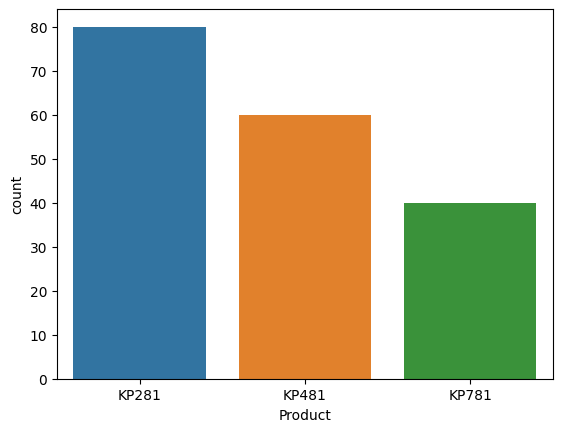

In [ ]:
# Product Analysis - count plot
sns.countplot(data=df,x='Product')
plt.show



*   **KP281 most buyed product**
*  **KP781 least buyed product**



<function matplotlib.pyplot.show(close=None, block=None)>

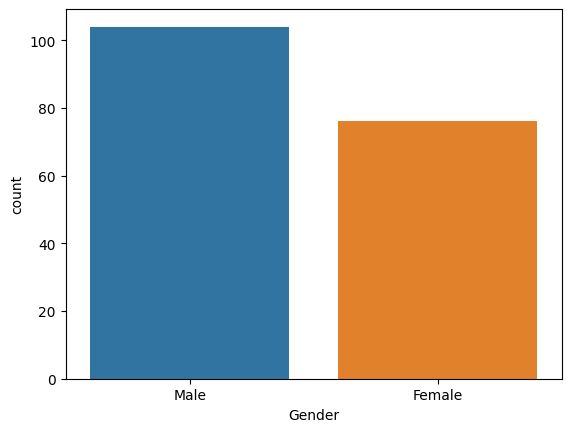

In [ ]:
# Gender Analysis - count plot
sns.countplot(data=df,x='Gender')
plt.show

Males are more interested in buying product than females

<function matplotlib.pyplot.show(close=None, block=None)>

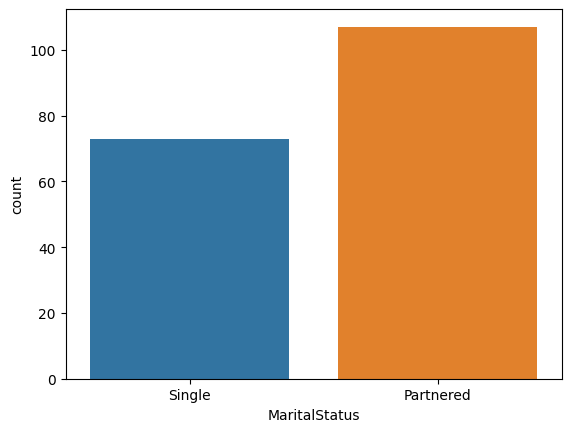

In [ ]:
# MaritalStatus Analysis - count plot
sns.countplot(data=df,x='MaritalStatus')
plt.show

partnered are using the product more than single

<ipython-input-114-fc4b72b3e876>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Income)


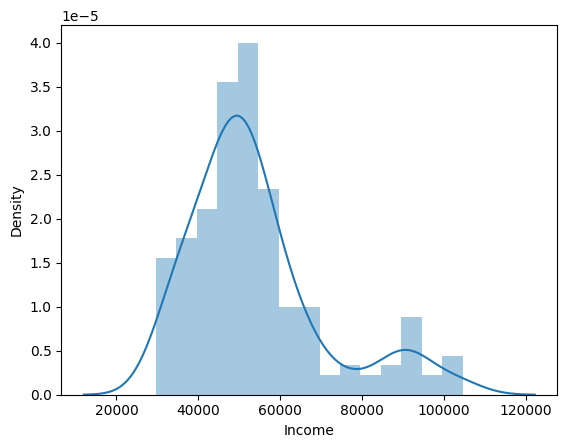

In [ ]:
# Income Analysis - Distplot
sns.distplot(df.Income)
plt.show()

**Most of customers who have purchased the product have a average income between 40K to 60K**

<Axes: xlabel='Education', ylabel='Count'>

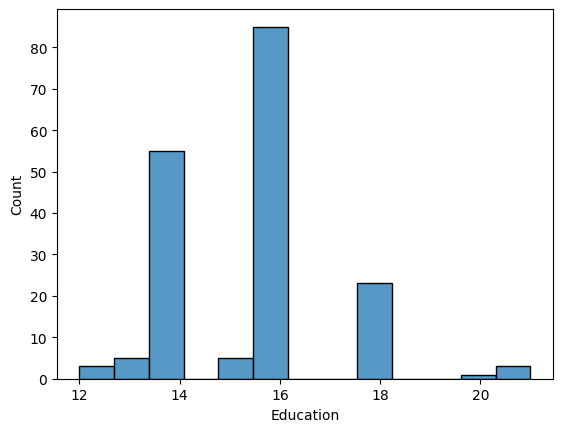

In [ ]:
# Education Analysis - Histogram
sns.histplot(data=df,x='Education')



*   Highest number of customers have 16 as their Education
*   14 is the second highest education among the customers
*   20 is the least education among the customers






<ipython-input-116-78b5541b1faa>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(),annot=True,fmt='.4f',linewidths=.5,cmap='coolwarm')


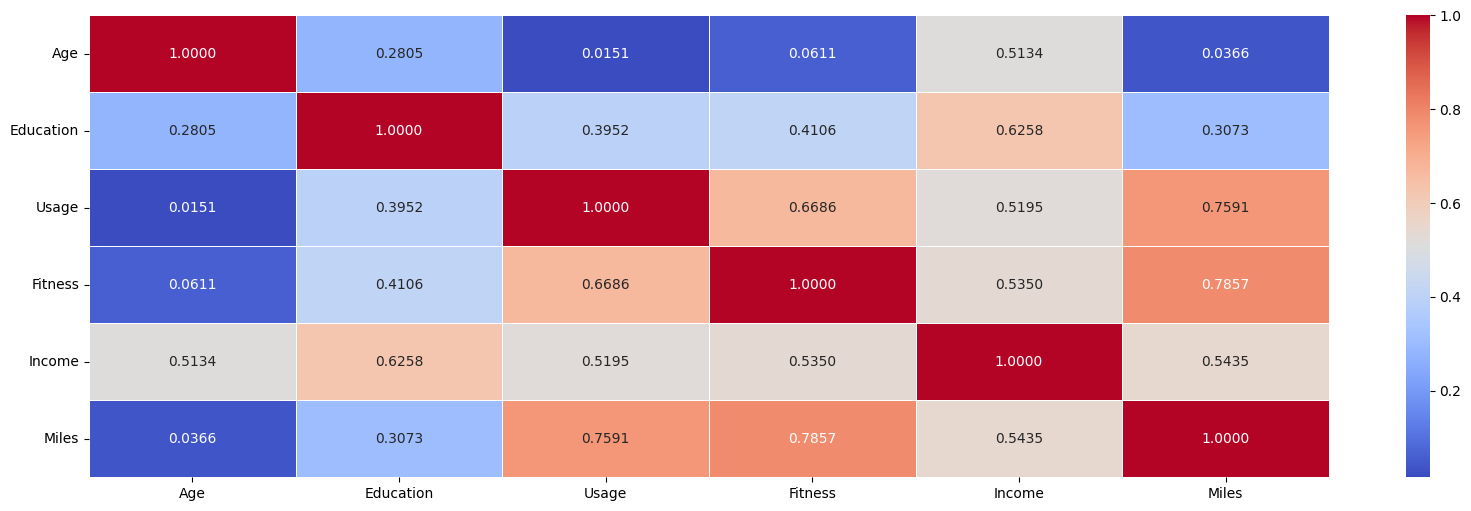

In [ ]:
#Correlation HeatMap
plt.figure(figsize=(20,6))
ax = sns.heatmap(df.corr(),annot=True,fmt='.4f',linewidths=.5,cmap='coolwarm')
plt.yticks(rotation=0)
plt.show()

-Correlation between Age and Miles is 0.03

-Correlation between Education and Income is 0.62

-Correlation between Usage and Fitness is 0.66

-Correlation between Fitness and Age is 0.06

-Correlation between Income and Usage is 0.51

-Correlation between Miles and Age is 0.03

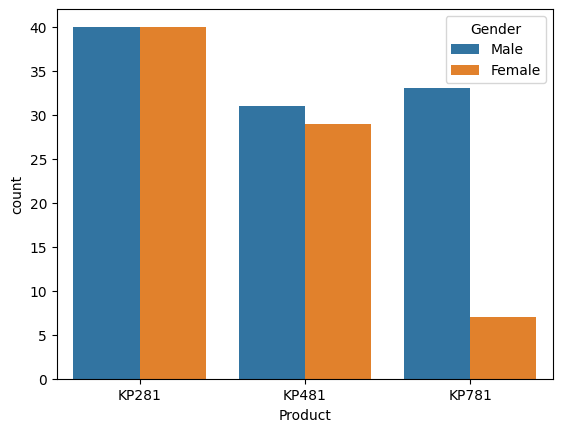

In [ ]:
sns.countplot(data=df,x='Product',hue='Gender')
plt.show()

-KP281 equally purchased by men and women.

-KP781 product purchased mostly by men than women.

-Mostly men are buying the products in comparison to women.

In [ ]:
df.groupby('Product')['Usage'].mean()

Product
KP281    3.087500
KP481    3.066667
KP781    4.775000
Name: Usage, dtype: float64

In [ ]:
df.groupby('Product')['Education'].mean()

Product
KP281    15.037500
KP481    15.116667
KP781    17.325000
Name: Education, dtype: float64

In [ ]:
df.groupby('Product')['Age'].mean()

Product
KP281    28.55
KP481    28.90
KP781    29.10
Name: Age, dtype: float64

In [ ]:
df.groupby('Product')['Fitness'].mean()

Product
KP281    2.9625
KP481    2.9000
KP781    4.6250
Name: Fitness, dtype: float64

When grouping the product types,we can observe **KP781** has the highest average in terms of **usage,education,age** and **fitness**

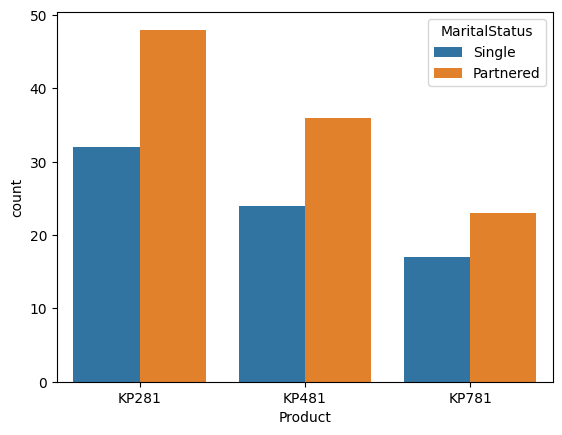

In [ ]:
sns.countplot(data=df,x='Product',hue='MaritalStatus')
plt.show()

-KP281 is the most preferred product among customers.

-KP481 is the second most preferred product among the customers.

-Between Singles and Partnered, Partnered customers are the major product purchasers.

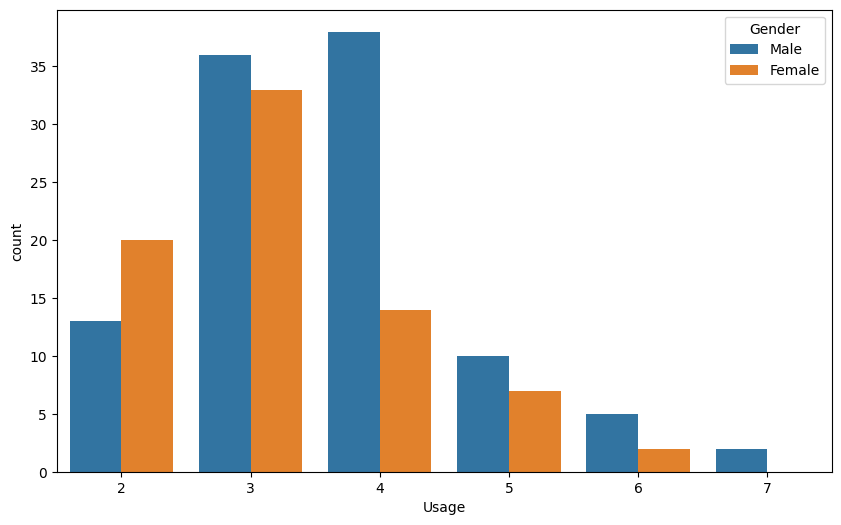

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Usage',hue='Gender')
plt.show()

-Among Male and Female genders, Male's usage is 4 days per week.

-Female customers mostly use 3 days per week.

-Only few Male customers use 7 days per week whereas female customer's maximum usage is only 6 days per week

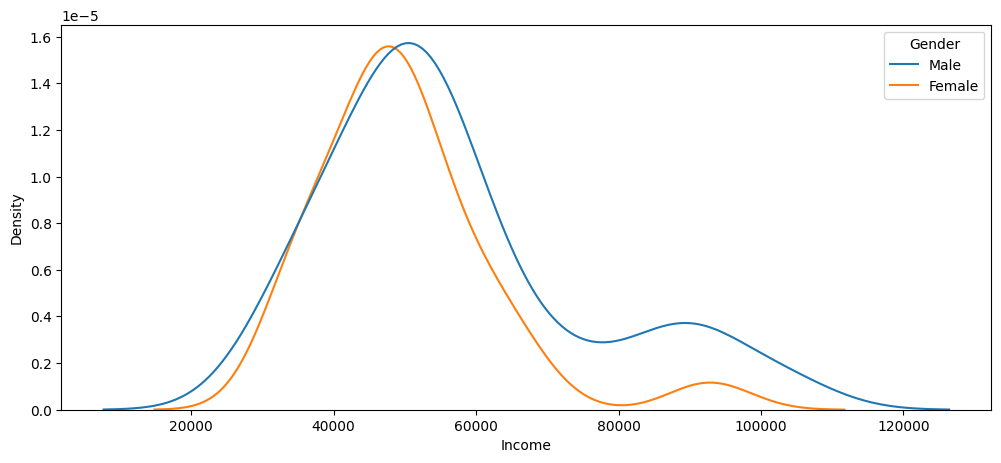

In [ ]:
# Product purchased Customers Income and their Gender
plt.figure(figsize=(12,5))
sns.kdeplot(data=df,x='Income',hue='Gender')
plt.show()

From 40K to around 80K is the most common income per annum of the customers

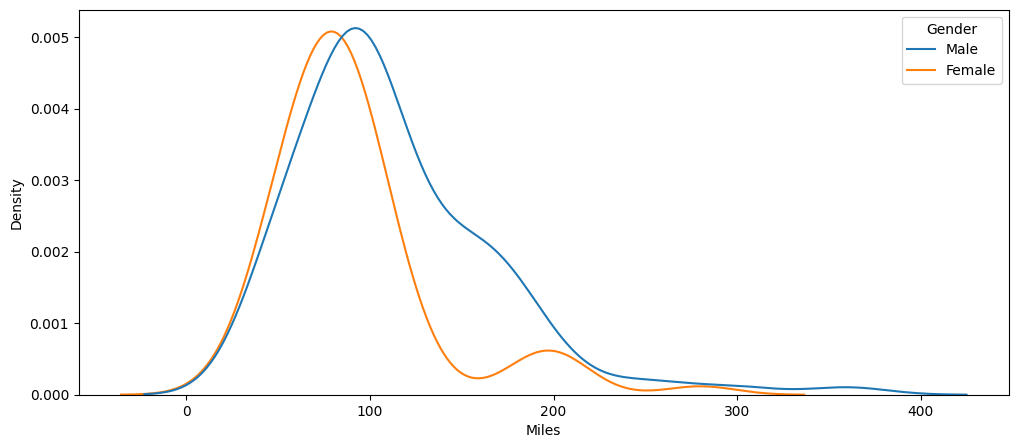

In [ ]:
#Miles coverage
plt.figure(figsize=(12,5))
sns.kdeplot(data=df,x='Miles',hue='Gender')
plt.show()

-Males have covered better distance than females.

-Females have just covered greater than 300.

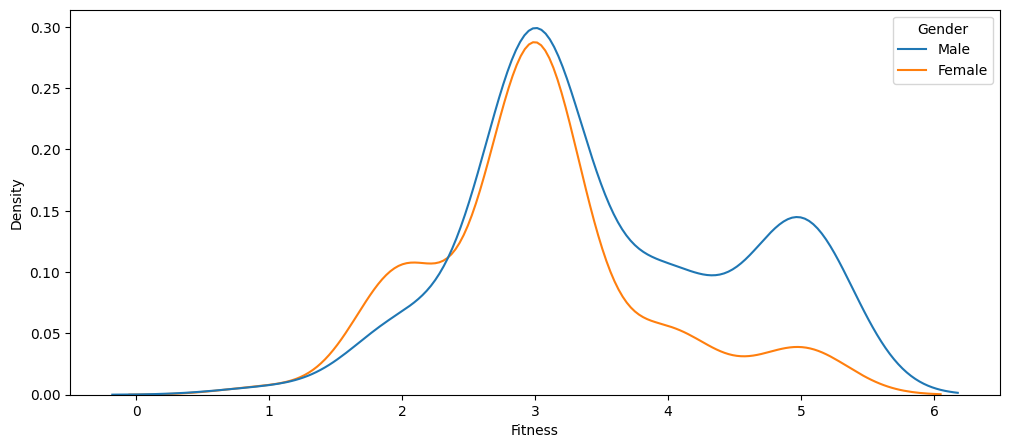

In [ ]:
plt.figure(figsize=(12,5))
sns.kdeplot(data=df,x='Fitness',hue='Gender')
plt.show()

-Male customers are in better shape the female customers.

-Though Female customers do not have poor shape, they are also not in excellent shape.

-Some Male customers excellent body shape.

<Axes: xlabel='Miles', ylabel='Income'>

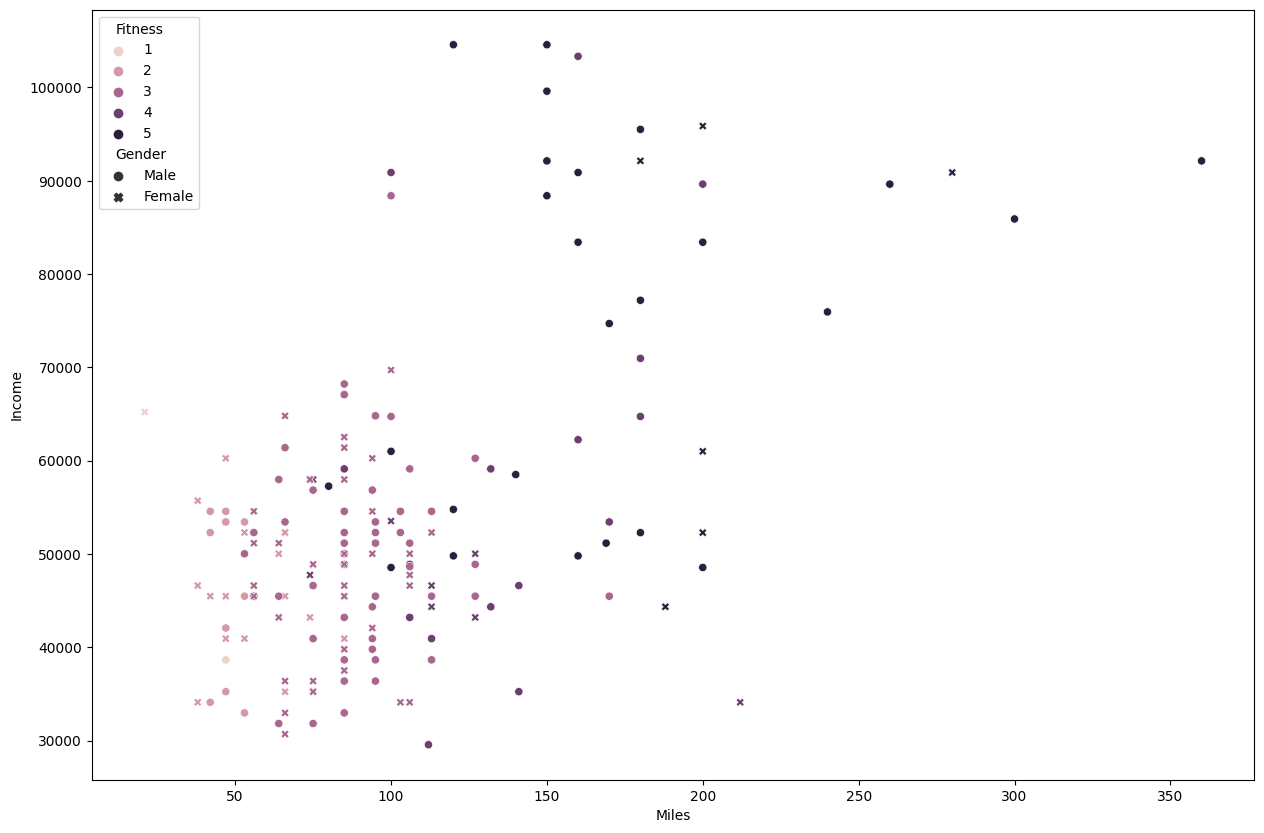

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Miles',y='Income',data=df,hue='Fitness',style='Gender')

-Above scattered Plot shows the overall picture over customer's income, how much they exercise (run/walk miles) given their gender and their fitness level.

-Most of the customer's fitness level is around 3 to 4 . and it says people who run more miles are having good fitness level.

-Though there is a trend with income and miles. But there are very few customers who earn a lot and run more miles.

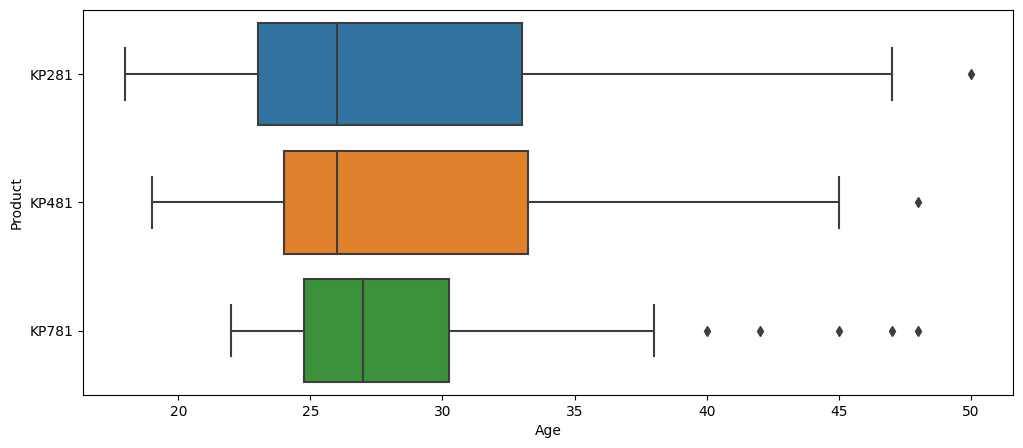

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Age',y='Product',data=df)
plt.show()

-Roughly few customers with age above 40 use product KP781.

-Most of the customers are comfortable with KP281 product type.

-KP481 is the second highest popular product among the younger side of the customer.


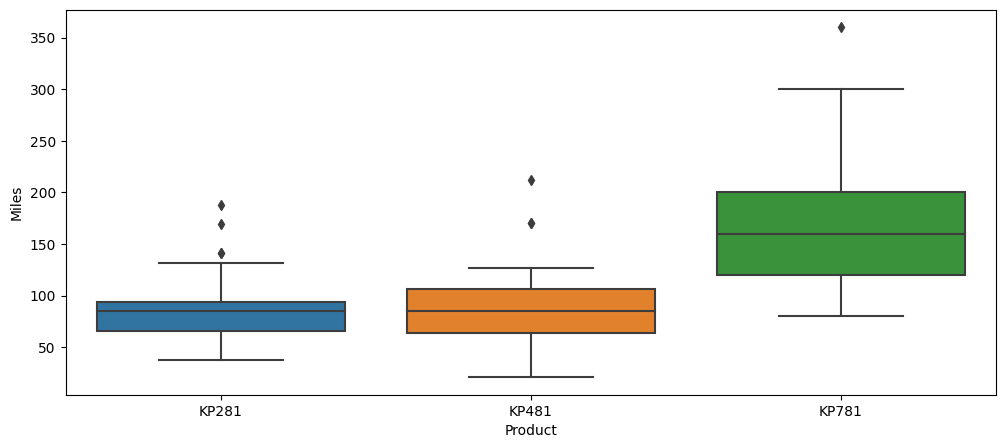

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(y='Miles',x='Product',data=df)
plt.show()

-KP781 has been able to cover more miles than the other two.

-KP281 & KP481 both have nearly same average in terms of mile coverage.


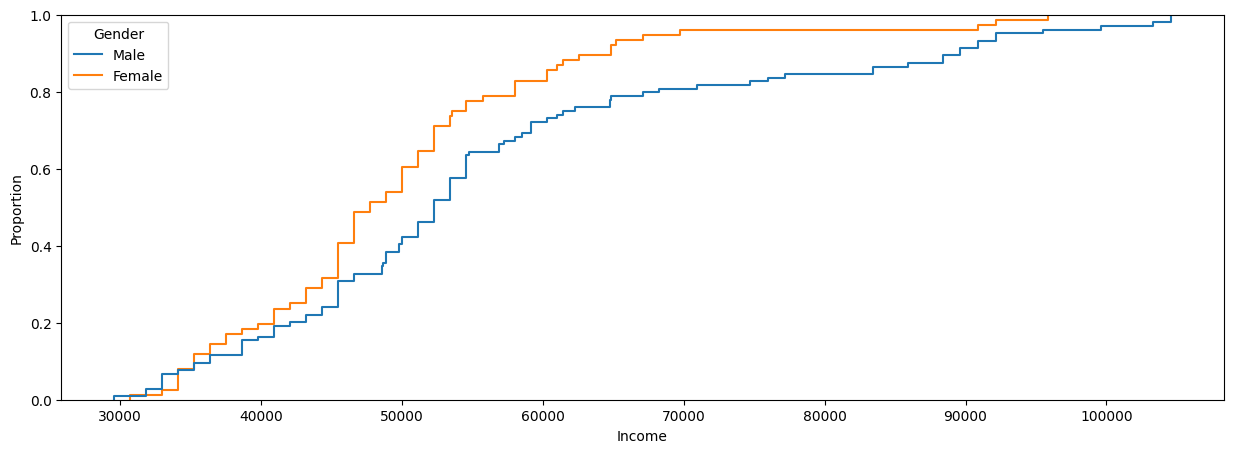

In [ ]:
# Empirical Cumulative Distribution Function - proportional distribution for Income of customers against their Gender
plt.figure(figsize=(15,5))
sns.ecdfplot(data=df,x='Income',hue='Gender',complementary=False)
plt.show()

-Male customers with Higher salaries are the most common purchasers of the product.

-Couple of Female customers less than 30K have also purchased aerofit product

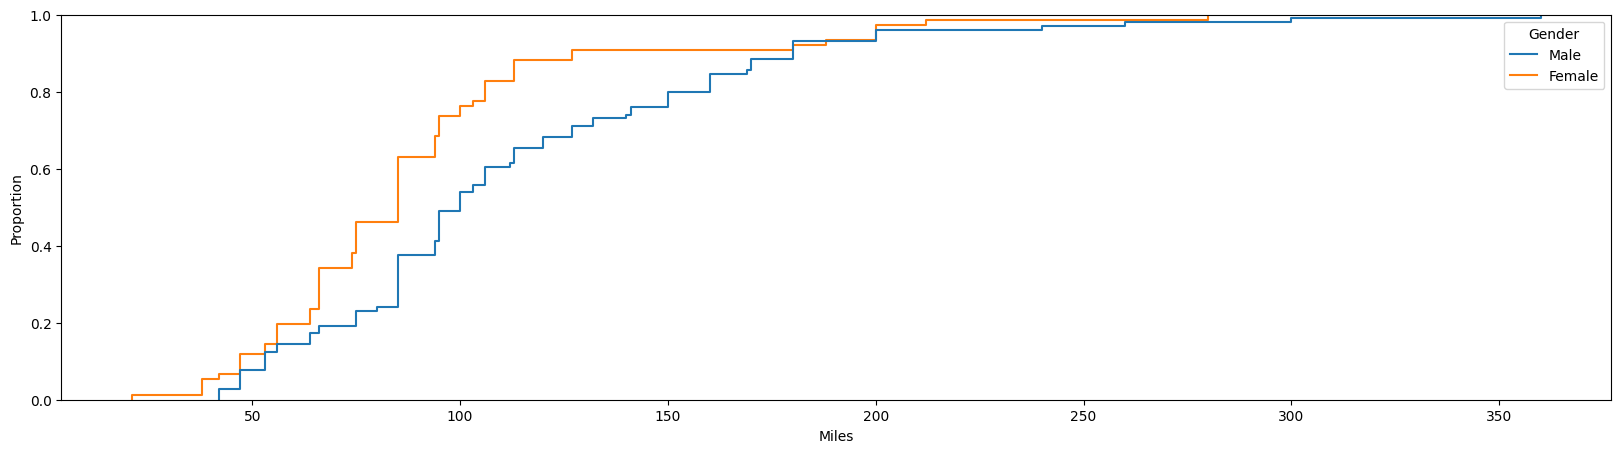

In [ ]:
plt.figure(figsize=(20,5))
sns.ecdfplot(data=df,x='Miles',hue='Gender',complementary=False)
plt.show()

-Male customers cover more miles than female customer with lower proportion than female customers

-Female customers proportion is higher than the male customers

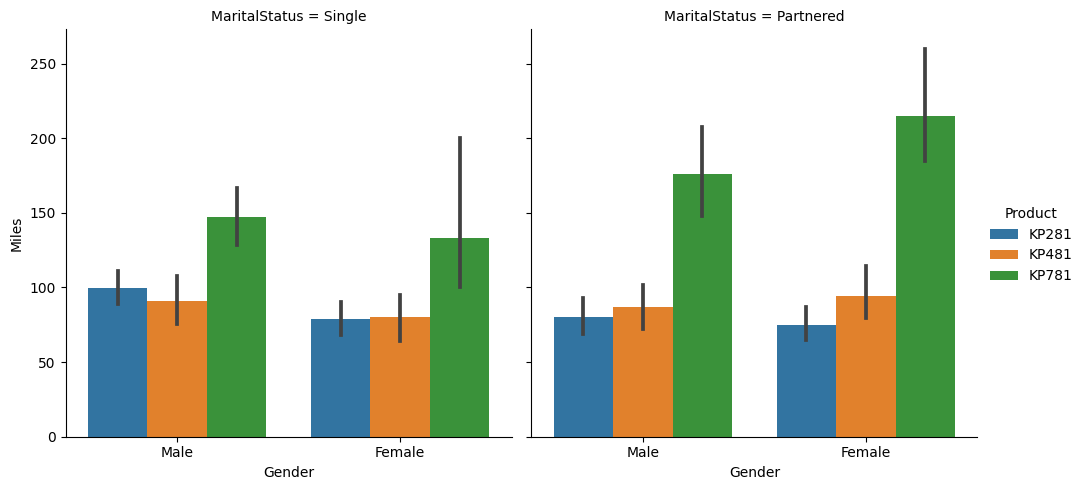

In [ ]:
sns.catplot(x='Gender',y='Miles',hue='Product',col='MaritalStatus',data=df,kind='bar')
plt.show()

-KP781 is more populat among the single and Partnered customers.

-Single Female customers bought KP281 treadmill slightly more compared to Single Male customers.

-Partnered Male customers bought KP281 treadmill slightly more than Single Male customers.

-Single Male customers bought KP781 treadmill compared to single Female.

-Partnered customers are more than Single customers.


Probability for each product for the both genders

In [ ]:
def gender_Probability(gender,df):
    print(f"Prob P(KP781) for {gender}: {round(df['KP781'][gender]/df.loc[gender].sum(),3)}")
    print(f"Prob P(KP481) for {gender}: {round(df['KP481'][gender]/df.loc[gender].sum(),3)}")
    print(f"Prob P(KP281) for {gender}: {round(df['KP281'][gender]/df.loc[gender].sum(),3)}")

df_temp = pd.crosstab(index=df['Gender'],columns=[df['Product']])
print("Prob of Male: ",round(df_temp.loc['Male'].sum()/len(df),3))
print("Prob of Female: ",round(df_temp.loc['Female'].sum()/len(df),3))
print()
gender_Probability('Male',df_temp)
print()
gender_Probability('Female',df_temp)

Prob of Male:  0.578
Prob of Female:  0.422

Prob P(KP781) for Male: 0.317
Prob P(KP481) for Male: 0.298
Prob P(KP281) for Male: 0.385

Prob P(KP781) for Female: 0.092
Prob P(KP481) for Female: 0.382
Prob P(KP281) for Female: 0.526


Probability of each product for given Marital Status

In [ ]:
def MS_Probability(ms_status,df):
    print(f"Prob P(KP781) for {ms_status}: {round(df['KP781'][ms_status]/df.loc[ms_status].sum(),3)}")
    print(f"Prob P(KP481) for {ms_status}: {round(df['KP481'][ms_status]/df.loc[ms_status].sum(),3)}")
    print(f"Prob P(KP281) for {ms_status}: {round(df['KP281'][ms_status]/df.loc[ms_status].sum(),3)}")

df_temp = pd.crosstab(index=df['MaritalStatus'],columns=[df['Product']])
print("Prob of P(Single): ",round(df_temp.loc['Single'].sum()/len(df),3))
print("Prob of P(Married/Partnered): ",round(df_temp.loc['Partnered'].sum()/len(df),3))
print()
MS_Probability('Single',df_temp)
print()
MS_Probability('Partnered',df_temp)

Prob of P(Single):  0.406
Prob of P(Married/Partnered):  0.594

Prob P(KP781) for Single: 0.233
Prob P(KP481) for Single: 0.329
Prob P(KP281) for Single: 0.438

Prob P(KP781) for Partnered: 0.215
Prob P(KP481) for Partnered: 0.336
Prob P(KP281) for Partnered: 0.449


In [ ]:
pd.crosstab(columns=df["Fitness"],index=df["Product"])

Fitness,1,2,3,4,5
Product,,,,,
KP281,1,14,54,9,2
KP481,1,12,39,8,0
KP781,0,0,4,7,29


In [ ]:
round(pd.crosstab(columns=df["Fitness"],index=df["Product"],normalize="columns")*100,2)

Fitness,1,2,3,4,5
Product,,,,,
KP281,50.0,53.85,55.67,37.50,6.45
KP481,50.0,46.15,40.21,33.33,0.00
KP781,0.0,0.00,4.12,29.17,93.55


In [ ]:
pd.crosstab(index=[df.Product,df.Fitness],columns=df.Gender)

Gender           Female  Male
Product Fitness              
KP281   1             0     1
        2            10     4
        3            26    28
        4             3     6
        5             1     1
KP481   1             1     0
        2             6     6
        3            18    21
        4             4     4
KP781   3             1     3
        4             1     6
        5             5    24

In [ ]:
round(pd.crosstab(index=[df.Product,df.Fitness],columns=df.Gender,normalize=True)*100,2)

Gender           Female   Male
Product Fitness               
KP281   1          0.00   0.56
        2          5.56   2.22
        3         14.44  15.56
        4          1.67   3.33
        5          0.56   0.56
KP481   1          0.56   0.00
        2          3.33   3.33
        3         10.00  11.67
        4          2.22   2.22
KP781   3          0.56   1.67
        4          0.56   3.33
        5          2.78  13.33

In [ ]:
round(pd.crosstab(index=[df.Product,df.MaritalStatus],columns=df.Gender,normalize=True),2)

Gender                 Female  Male
Product MaritalStatus              
KP281   Partnered        0.15  0.12
        Single           0.07  0.11
KP481   Partnered        0.08  0.12
        Single           0.08  0.06
KP781   Partnered        0.02  0.11
        Single           0.02  0.08

In [ ]:
pd.crosstab([df.Product],df.Gender,margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [ ]:
np.round(((pd.crosstab(df.Product,df.Gender,margins=True))/180)*100,2)

Gender,Female,Male,All
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
All,42.22,57.78,100.00


Marginal Probability

Probability of Male Customer Purchasing any product is : 57.77 %

Probability of Female Customer Purchasing any product is : 42.22 %

Marginal Probability of any customer buying

product KP281 is : 44.44 % (cheapest / entry level product)

product KP481 is : 33.33 % (intermediate user level product)

product KP781 is : 22.22 % (Advanced product)

In [ ]:
np.round((pd.crosstab([df.Product],df.Gender,margins=True,normalize="columns"))*100,2)

Gender,Female,Male,All
Product,,,
KP281,52.63,38.46,44.44
KP481,38.16,29.81,33.33
KP781,9.21,31.73,22.22


Probability of Selling Product

KP281 | Female = 52 %

KP481 | Female = 38 %

KP781 | Female = 10 %

KP281 | male = 38 %

KP481 | male = 30 %

KP781 | male = 32 %

Probability of Female customer buying KP281(52.63%) is more than male(38.46%).

KP281 is more recommended for female customers.

Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).

Probability of Female customer buying Product KP481(38.15%) is significantly higher than male (29.80%. )

KP481 product is specifically recommended for Female customers who are intermediate user

**KP281**

-Easily affordable,maximum selling product.

-most popular product among the entry level customers.

-used 3 or 4 times a week.

-Average distance covered is around 70 to 90 miles.

-Fitness rating as average.

-Young to Elder beginner level prefer this product.

-Single female & Partnered male customers bought this product more than single male customers.

-Income range between 39K to 53K preferrred for this product.



**KP481**

-Average distance covered in this product is from 70 to 130 miles per week.

-More Female customers prefer this product than males.


-Probability of Female customer buying KP481 is significantly higher than male.

-Probability of Female customer buying KP481 is significantly higher than male.

-Average Income of the customer who buys KP481 is 49K.

-Average Usage of this product is 3 days per week.

-More Partnered customers prefer this product.

-There are slightly more male buyers of the KP481.

-The age range of KP481 treadmill customers is roughly between 24-34 years.

**KP781**

-Due to the High Price & being the advanced type, customer prefers less of this product.

-Customers who use this product have rated excelled shape as fitness rating.


-Customers use 4 to 5 times a week at least.

-Customer walk/run average 120 to 200 or more miles per week on his product.

-Female Customers who are running average 180 miles (extensive exercise) , are using product KP781, which is higher than Male average using same product.

-Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).

-Probability of a single person buying KP781 is higher than Married customers. So , KP781 is also recommended for people who are single and exercises more.

-Average Income of KP781 buyers are over 75K per annum

-This product is preferred by the customer where the correlation between Education and Income is High.



**Recommendation**

-Female who prefer exercising equipments are very low here. Hence, we should run a marketing campaign on to encourage women to exercise more

-KP281 & KP481 treadmills are preferred by the customers whose annual income lies in the range of 39K - 53K Dollars. These models should promoted as budget treadmills.

-As KP781 provides more features and functionalities, the treadmill should be marketed for professionals and athletes & should be promoted using atheletes.

-Provide customer support and recommend users to upgrade from lower versions to next level versions after consistent usages.

-Target the Age group above 40 years to recommend Product KP781.

